Chapter 03

# 离群值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
from scipy import stats

In [2]:
# Load the iris data
iris_sns = sns.load_dataset("iris") 
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

## 直方图

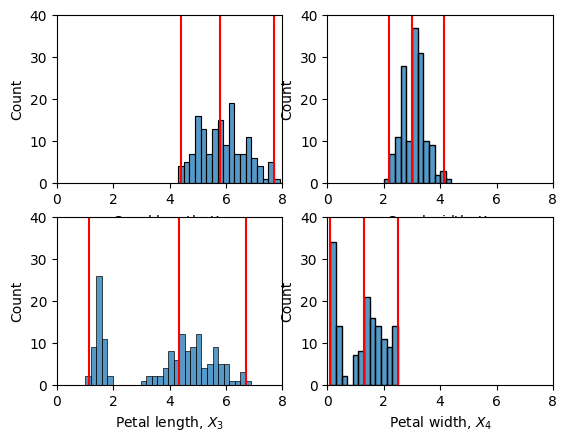

In [3]:
#%% Histograms

# visualize two tails (1%, 99%)

num = 0
fig, axes = plt.subplots(2,2)

for i in [0,1]:
    for j in [0,1]:
        
        sns.histplot(data=X_df, 
                     x = feature_names[num], 
                     binwidth = 0.2, 
                     ax = axes[i][j])
        axes[i][j].set_xlim([0,8]); 
        axes[i][j].set_ylim([0,40])
        
        q1, q50, q99 = np.percentile(X_df[feature_names[num]], 
                                     [1,50,99])
        axes[i][j].axvline(x=q1, color = 'r')
        axes[i][j].axvline(x=q50, color = 'r')
        axes[i][j].axvline(x=q99, color = 'r')
        
        num = num + 1

# visualize locations of three quartiles

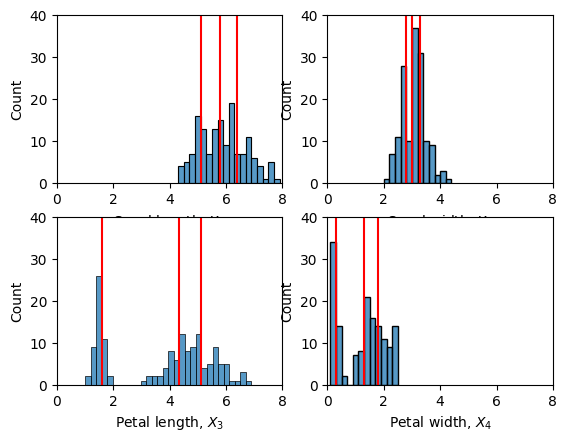

In [4]:
num = 0

fig, axes = plt.subplots(2,2)

for i in [0,1]:
    for j in [0,1]:
        
        sns.histplot(data=X_df, x = feature_names[num], 
                     binwidth = 0.2, ax = axes[i][j])
        axes[i][j].set_xlim([0,8]); 
        axes[i][j].set_ylim([0,40])
        
        q75, q50, q25 = np.percentile(X_df[feature_names[num]], 
                                      [75,50,25])
        axes[i][j].axvline(x=q75, color = 'r')
        axes[i][j].axvline(x=q50, color = 'r')
        axes[i][j].axvline(x=q25, color = 'r')
        
        num = num + 1

## 概率密度

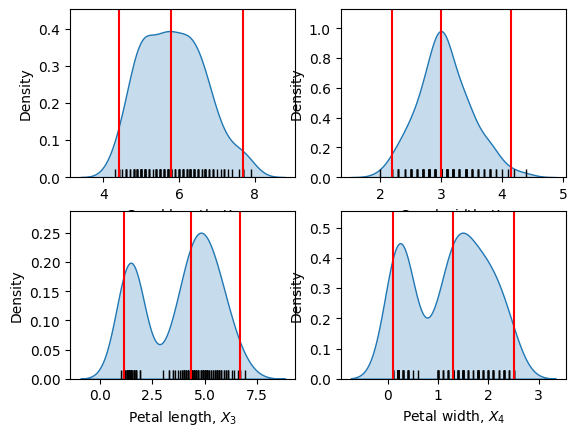

In [5]:
#%% KDE +rug plot

num = 0
fig, axes = plt.subplots(2,2)

for i in [0,1]:
    for j in [0,1]:
        
        sns.kdeplot(data=X_df, x = feature_names[num], 
                    ax = axes[i][j], fill = True)
        sns.rugplot(data=X_df, x = feature_names[num], 
                    ax = axes[i][j], color = 'k', height=.05)
        
        q1, q50, q99 = np.percentile(X_df[feature_names[num]], 
                                     [1,50,99])
        axes[i][j].axvline(x=q1, color = 'r')
        axes[i][j].axvline(x=q50, color = 'r')
        axes[i][j].axvline(x=q99, color = 'r')
        
        num = num + 1

## 平面散点图

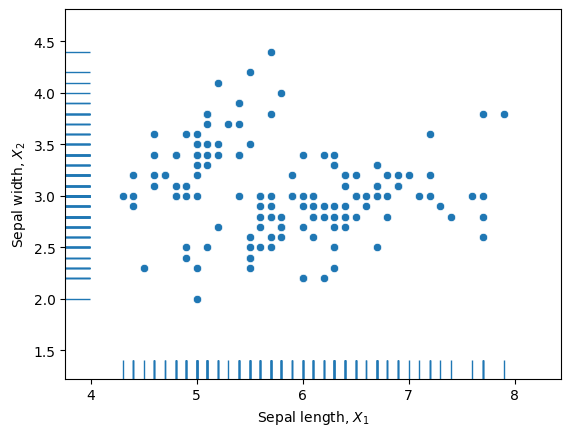

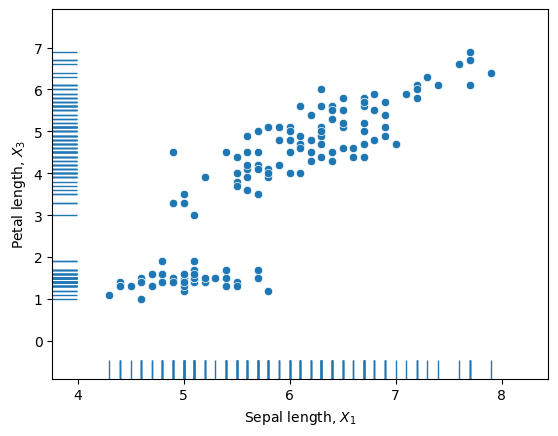

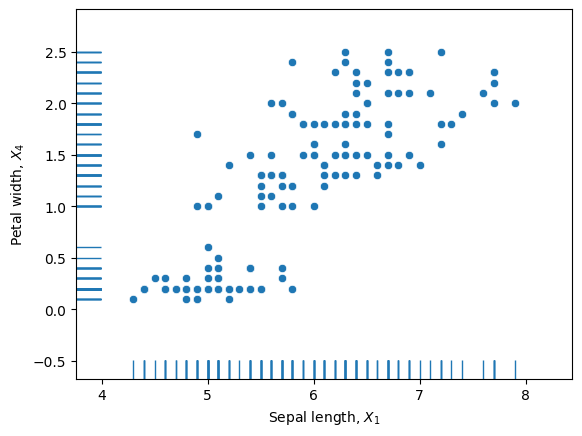

In [6]:
#%% scatter plot

for i in [1,2,3]:
    
    fig, axes = plt.subplots()
    
    sns.scatterplot(data=X_df, x=feature_names[0], y=feature_names[i])
    sns.rugplot    (data=X_df, x=feature_names[0], y=feature_names[i], height=.05)

## 成对特征

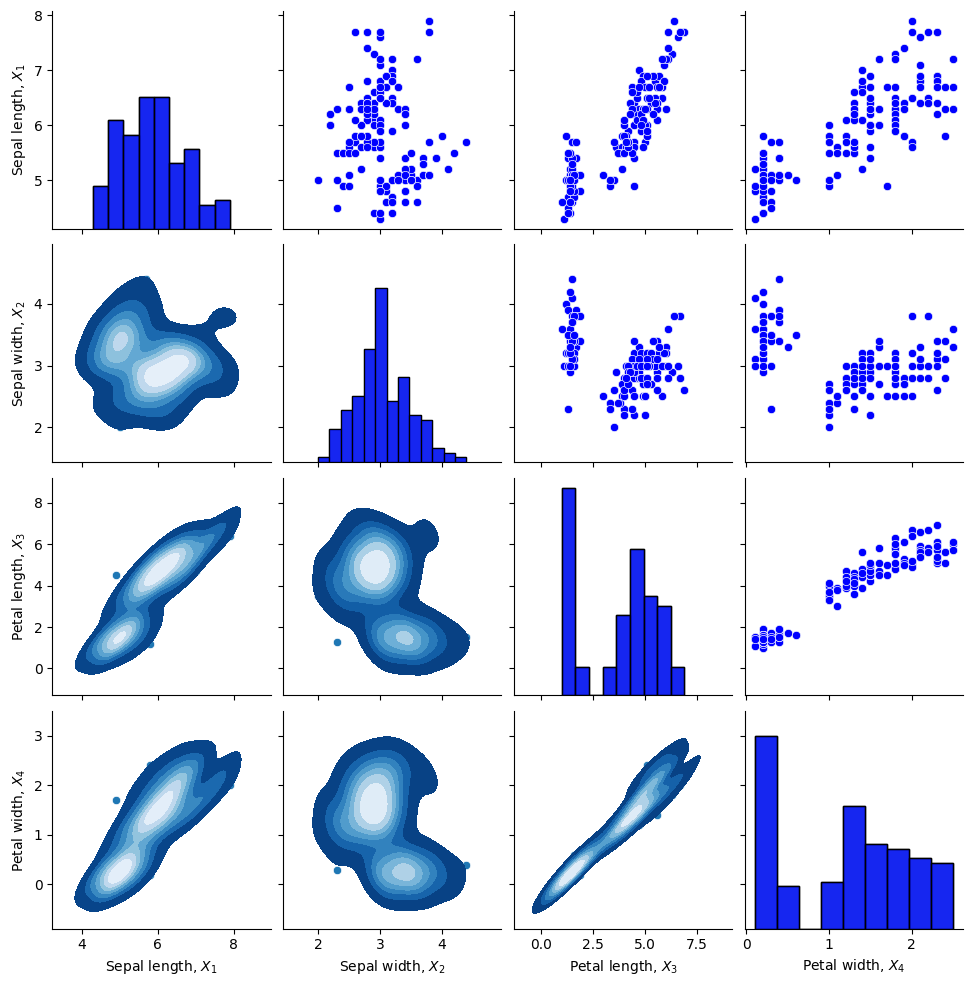

In [7]:
#%% pairplot

g = sns.pairplot(X_df)
g.map_upper(sns.scatterplot, color = 'b')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r") 
g.map_diag(sns.histplot, kde=False, color = 'b')

## QQ图

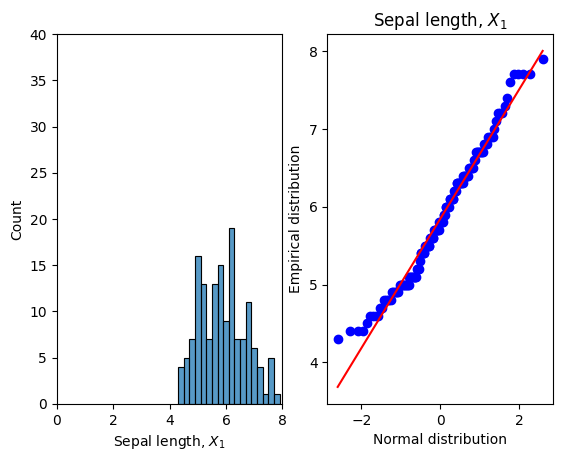

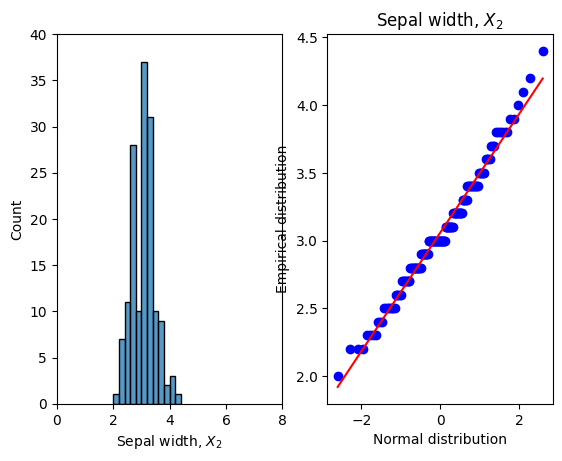

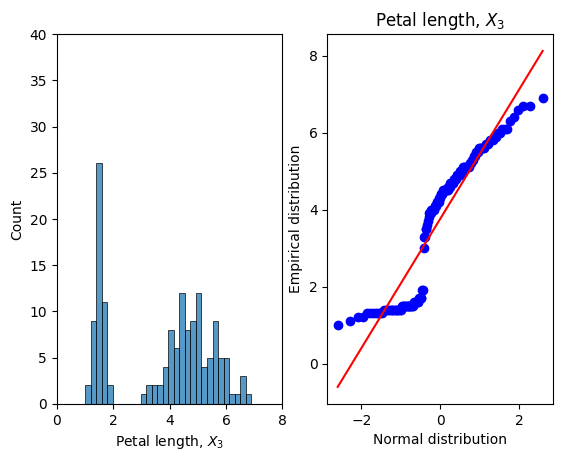

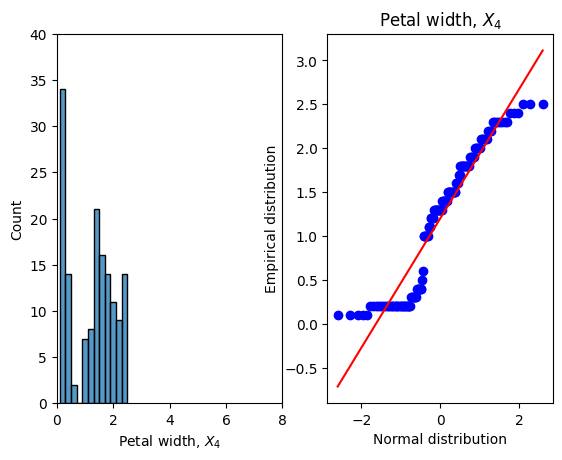

In [8]:
#%% QQ plot

import pylab

num = 0;

for i in [0,1]:
    for j in [0,1]:
        
        fig, axes = plt.subplots(1,2)
        
        sns.histplot(data=X_df, x = feature_names[num], binwidth = 0.2, ax = axes[0])
        axes[0].set_xlim([0,8]); axes[0].set_ylim([0,40])
        
        values = X_df[feature_names[num]]
        
        stats.probplot(values, dist="norm", plot=pylab)

        plt.xlabel('Normal distribution')
        plt.ylabel('Empirical distribution')
        plt.title(feature_names[num])
        num = num + 1

## 箱型图

       Sepal length, $X_1$  Sepal width, $X_2$  Petal length, $X_3$  \
count           150.000000          150.000000           150.000000   
mean              5.843333            3.057333             3.758000   
std               0.828066            0.435866             1.765298   
min               4.300000            2.000000             1.000000   
25%               5.100000            2.800000             1.600000   
50%               5.800000            3.000000             4.350000   
75%               6.400000            3.300000             5.100000   
max               7.900000            4.400000             6.900000   

       Petal width, $X_4$  
count          150.000000  
mean             1.199333  
std              0.762238  
min              0.100000  
25%              0.300000  
50%              1.300000  
75%              1.800000  
max              2.500000  


,"Sepal length, $X_1$","Sepal width, $X_2$","Petal length, $X_3$","Petal width, $X_4$"
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


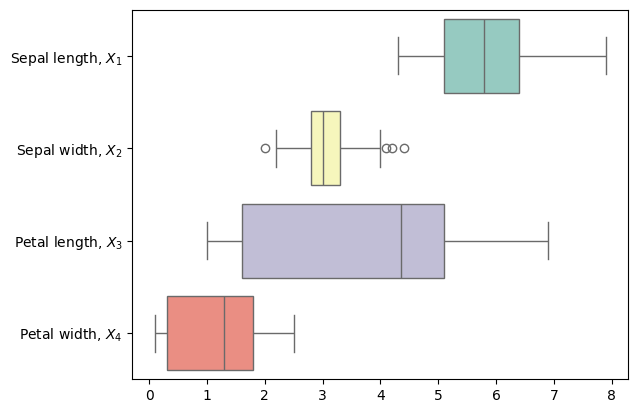

In [9]:
#%% box plot of data

fig, ax = plt.subplots()
sns.boxplot(data=X_df, palette="Set3", orient="h")

print(X_df.describe())

X_df.quantile(q=[0.25, 0.5, 0.75], axis=0, 
              numeric_only=True, interpolation='midpoint')

## 箱型图 + 蜂群图

C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

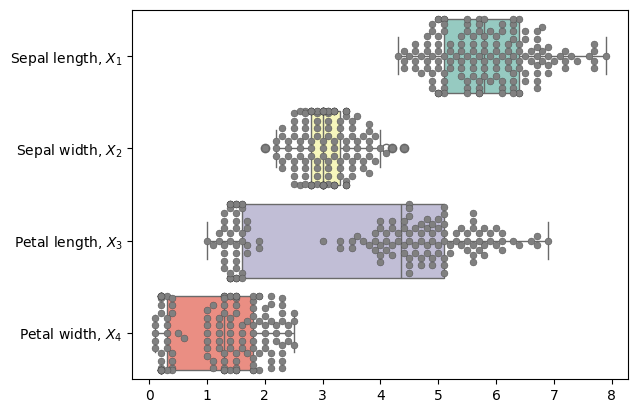

In [10]:
#%% combine boxplot and swarmplot

fig, ax = plt.subplots()

sns.boxplot(data=X_df, orient="h", palette="Set3")

sns.swarmplot(data=X_df, 
               linewidth=0.25, orient="h", color=".5")

## z分数

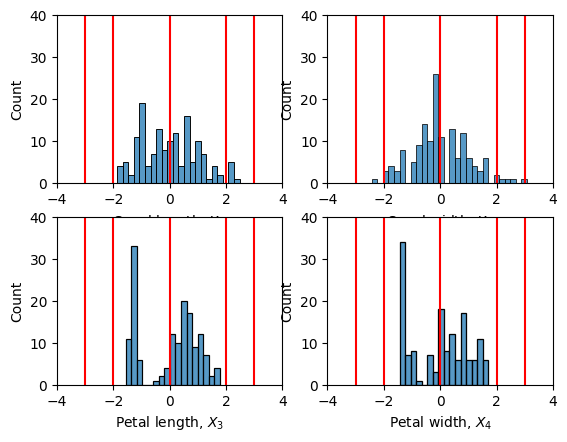

In [11]:
#%% z score

from scipy import stats

df_zscore = (X_df - X_df.mean())/X_df.std()

# z_score = stats.zscore(X_df)

num = 0

fig, axes = plt.subplots(2,2)

for i in [0,1]:
    for j in [0,1]:
        
        sns.histplot(data=df_zscore, x = feature_names[num], binwidth = 0.2, ax = axes[i][j])
        axes[i][j].set_xlim([-4,4]); axes[i][j].set_ylim([0,40])
        
        axes[i][j].axvline(x=3, color = 'r')
        axes[i][j].axvline(x=2, color = 'r')
        axes[i][j].axvline(x=-3, color = 'r')
        axes[i][j].axvline(x=-2, color = 'r')
        axes[i][j].axvline(x=0, color = 'r')
        
        num = num + 1

## 马氏距离

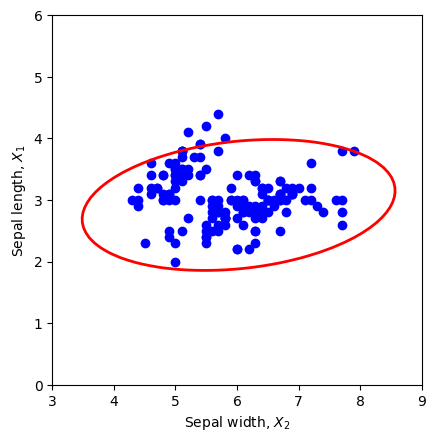

In [12]:
#%% Mahal distance

from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.05)

xx, yy = np.meshgrid(np.linspace(3, 9, 50), np.linspace(1, 5, 50))

clf.fit(X_df.values[:,:2])
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='r')

ax.scatter(X_df.values[:, 0], X_df.values[:, 1], color='b')

ax.set_xlim((3,9))
ax.set_ylim((0,6))

ax.set_ylabel(feature_names[0]);
ax.set_xlabel(feature_names[1]);
ax.set_aspect('equal', adjustable='box')


#%%